<a href="https://colab.research.google.com/github/jsebastianquiroga/DEEP_LEARNING_UPJ/blob/main/taller_dos/traffic_sign_classification_and_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import zipfile
#import os

#files = zipfile.ZipFile('Datos.zip', 'r')
#files.extractall(os.getcwd())
#files.close()  

<h1> <strong> 2) Comprensión del dataset


• ¿Qué información presenta el dataset?

Este conjunto de datos contiene 6358 etiquetas de categorías etiquetadas manualmente. Las etiquetas incluyen las 10 categorías siguientes: `GuideSign`, `M1`, `M4`, `M5`, `M6`, `M7`, `P1`, `P10_50`, `P12`, `W1`, correspondientes a diez categorías diferentes de señales de tráfico. Todos los datos se han dividido manualmente en conjunto de entrenamiento y conjunto de prueba según la proporción.


Un muestreo aleatorio de las imagenes del dataset:

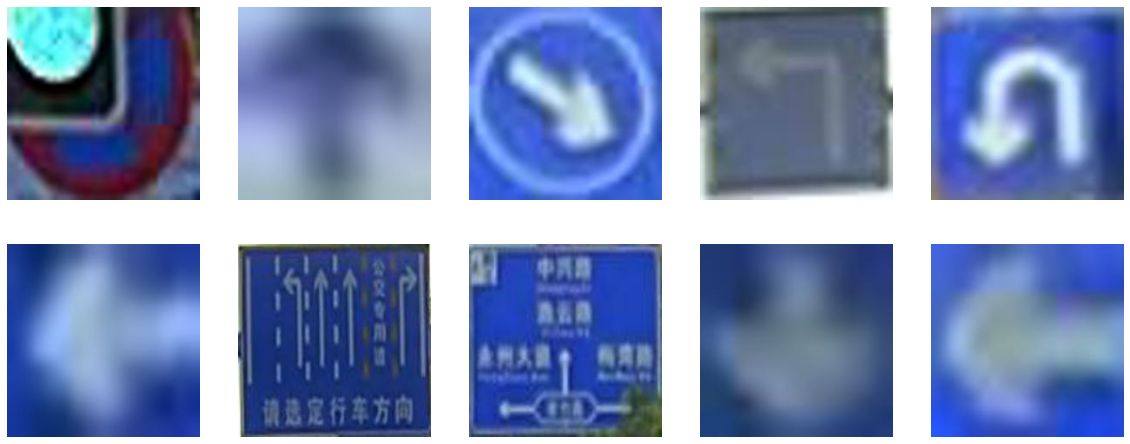

In [50]:
import os
import random
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Ruta a la carpeta principal que contiene todas las carpetas con imágenes
main_folder = 'train_dataset/train/'

# Lista de carpetas que contienen imágenes
subfolders = [f.path for f in os.scandir(main_folder) if f.is_dir()]

# Selecciona aleatoriamente 10 imágenes de las carpetas
img_list = []
for folder in subfolders:
    img_list += [os.path.join(folder, f) for f in os.listdir(folder)]
sample_imgs = random.sample(img_list, 10)

# Carga las imágenes y muestra en una cuadrícula de 2x5
fig, axs = plt.subplots(2, 5, figsize=(20, 8))
axs = axs.flatten()
for i, img_path in enumerate(sample_imgs):
    img = imread(img_path)
    axs[i].imshow(img)
    axs[i].axis('off')

plt.show()


Se identifican imagenes de transito en colores.


In [21]:
from PIL import Image
import os

# Especifica la ruta del directorio raíz que contiene los subdirectorios con las imágenes
root_dir = 'train_dataset/'

# Inicializa variables para contabilizar información del dataset
num_images = 0
image_sizes = set()

# Itera sobre todos los subdirectorios en el directorio raíz
for subdir, dirs, files in os.walk(root_dir):
    for filename in files:
        # Verifica que el archivo sea una imagen
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Carga la imagen
            img_path = os.path.join(subdir, filename)
            img = Image.open(img_path)

            # Contabiliza el número de imágenes y sus tamaños
            num_images += 1
            image_sizes.add(img.size)

# Imprime información del dataset
print(f'Número total de imágenes: {num_images}')
print(f'Tamaños de imágenes: {image_sizes}')



Número total de imágenes: 6024
Tamaños de imágenes: {(224, 224)}


In [26]:
from PIL import Image
import os

# Especifica la ruta del directorio raíz que contiene los subdirectorios con las imágenes
root_dir = 'test_dataset/'

# Inicializa variables para contabilizar información del dataset
num_images = 0
image_sizes = set()

# Itera sobre todos los subdirectorios en el directorio raíz
for subdir, dirs, files in os.walk(root_dir):
    for filename in files:
        # Verifica que el archivo sea una imagen
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Carga la imagen
            img_path = os.path.join(subdir, filename)
            img = Image.open(img_path)

            # Contabiliza el número de imágenes y sus tamaños
            num_images += 1
            image_sizes.add(img.size)

# Imprime información del dataset
print(f'Número total de imágenes: {num_images}')
print(f'Tamaños de imágenes: {image_sizes}')



Número total de imágenes: 324
Tamaños de imágenes: {(224, 224)}


## El conjunto de prueba se compone de 6024 imagenes y el de prueba de 324 imagenes cada una de un tamaño de 224 pixeles, analicemos los conjuntos de cada data set:

In [27]:
from PIL import Image
import os

# Especifica la ruta del directorio raíz que contiene los subdirectorios con las imágenes
root_dir = 'train_dataset/train/'

# Itera sobre todos los subdirectorios en el directorio raíz
for subdir, dirs, files in os.walk(root_dir):
    # Inicializa variables para contabilizar información del subdirectorio
    num_images = 0
    image_sizes = set()

    # Itera sobre todos los archivos en el subdirectorio
    for filename in files:
        # Verifica que el archivo sea una imagen
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Carga la imagen
            img_path = os.path.join(subdir, filename)
            img = Image.open(img_path)

            # Contabiliza el número de imágenes y sus tamaños
            num_images += 1
            image_sizes.add(img.size)

    # Imprime información del subdirectorio
    print(f'Carpeta: {subdir}')
    print(f'Número total de imágenes: {num_images}')
    print(f'Tamaños de imágenes: {image_sizes}')


Carpeta: train_dataset/train/
Número total de imágenes: 0
Tamaños de imágenes: set()
Carpeta: train_dataset/train/GuideSign
Número total de imágenes: 1171
Tamaños de imágenes: {(224, 224)}
Carpeta: train_dataset/train/M1
Número total de imágenes: 247
Tamaños de imágenes: {(224, 224)}
Carpeta: train_dataset/train/M4
Número total de imágenes: 3206
Tamaños de imágenes: {(224, 224)}
Carpeta: train_dataset/train/M5
Número total de imágenes: 213
Tamaños de imágenes: {(224, 224)}
Carpeta: train_dataset/train/M6
Número total de imágenes: 134
Tamaños de imágenes: {(224, 224)}
Carpeta: train_dataset/train/M7
Número total de imágenes: 469
Tamaños de imágenes: {(224, 224)}
Carpeta: train_dataset/train/P1
Número total de imágenes: 249
Tamaños de imágenes: {(224, 224)}
Carpeta: train_dataset/train/P10_50
Número total de imágenes: 95
Tamaños de imágenes: {(224, 224)}
Carpeta: train_dataset/train/P12
Número total de imágenes: 95
Tamaños de imágenes: {(224, 224)}
Carpeta: train_dataset/train/W1
Número 

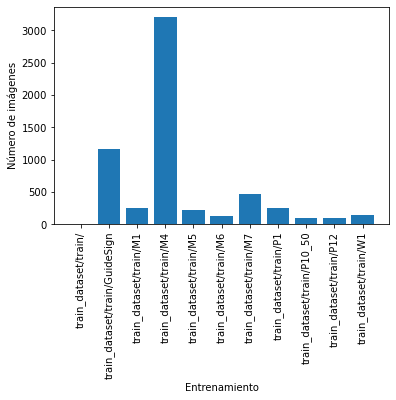

In [46]:
import matplotlib.pyplot as plt
from PIL import Image
import os

# Especifica la ruta del directorio raíz que contiene los subdirectorios con las imágenes
root_dir = 'train_dataset/train/'

# Inicializa un diccionario para contabilizar el número de imágenes por carpeta
num_images_per_folder = {}

# Itera sobre todos los subdirectorios en el directorio raíz
for subdir, dirs, files in os.walk(root_dir):
    # Inicializa un contador de imágenes para el subdirectorio actual
    num_images = 0

    # Itera sobre todos los archivos en el subdirectorio
    for filename in files:
        # Verifica que el archivo sea una imagen
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Incrementa el contador de imágenes
            num_images += 1

    # Agrega la cantidad de imágenes contabilizadas al diccionario
    num_images_per_folder[subdir] = num_images

# Genera un gráfico de barras que muestra el número de imágenes por carpeta
plt.bar(range(len(num_images_per_folder)), list(num_images_per_folder.values()), align='center')
plt.xticks(range(len(num_images_per_folder)), list(num_images_per_folder.keys()), rotation=90)
plt.xlabel('Entrenamiento')
plt.ylabel('Número de imágenes')
plt.show()


La cantidad de imagenes es casi proporcional en todos los casos excepto en las categorias Guidesign y M4

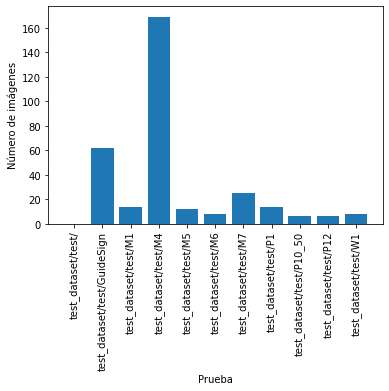

In [51]:
# Especifica la ruta del directorio raíz que contiene los subdirectorios con las imágenes
root_dir = 'test_dataset/test/'

# Inicializa un diccionario para contabilizar el número de imágenes por carpeta
num_images_per_folder = {}

# Itera sobre todos los subdirectorios en el directorio raíz
for subdir, dirs, files in os.walk(root_dir):
    # Inicializa un contador de imágenes para el subdirectorio actual
    num_images = 0

    # Itera sobre todos los archivos en el subdirectorio
    for filename in files:
        # Verifica que el archivo sea una imagen
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Incrementa el contador de imágenes
            num_images += 1

    # Agrega la cantidad de imágenes contabilizadas al diccionario
    num_images_per_folder[subdir] = num_images

# Genera un gráfico de barras que muestra el número de imágenes por carpeta
plt.bar(range(len(num_images_per_folder)), list(num_images_per_folder.values()), align='center')
plt.xticks(range(len(num_images_per_folder)), list(num_images_per_folder.keys()), rotation=90)
plt.xlabel('Prueba')
plt.ylabel('Número de imágenes')
plt.show()


La cantidad de imagenes es casi proporcional en todos los casos excepto en las categorias Guidesign y M4

## Se identifican 10 clases de clasificación en cada uno de los dataset de entrenamiento y prueba: 


| Categoria | Descripción        |
| --------- | -----------------  |
| Guidesign | Guide sign         |
| M1        | Indicating signs   |
| M4        | lane signage       |
| M5        | vehicle road sign  |
| M6        | bicycle road sign  |
| M7        | Zebra crossing logo|
| P1        | Prohibition sign   |
| P10_50    | speed limit sign   |
| P12       | courtesy sign      |
| W1        | warning signs      |


Breve explicación de cada categoría:

| Categoría | Descripción |
| --- | --- |
| Guidesign | Refiere al diseño y la colocación de señales de tráfico para guiar y orientar a los conductores y peatones en la vía pública. |
| M1 | Señales de tráfico que indican la dirección a seguir, como flechas de dirección y señales de carril para la entrada y salida de carriles. |
| M4 | Señales de tráfico que se colocan a lo largo de los carriles de tráfico para proporcionar información específica sobre los carriles de la carretera. |
| M5 | Señales de tráfico que indican la presencia de una carretera o un camino, y las restricciones o regulaciones que se aplican a los vehículos en la misma. |
| M6 | Señales de tráfico específicas para ciclistas que indican carriles o áreas exclusivas para bicicletas. |
| M7 | Señales de tráfico que indican la presencia de un paso de peatones y que alertan a los conductores para reducir la velocidad y ceder el paso a los peatones. |
| P1 | Señales de tráfico que indican una prohibición o restricción, como una señal de "prohibido estacionarse" o una señal de "prohibido girar a la izquierda". |
| P10_50 | Señales de tráfico que indican los límites de velocidad máxima en una determinada carretera o calle. |
| P12 | Señales de tráfico que indican una cortesía o sugerencia, como una señal de "cambio de carril sugerido" o una señal de "ceda el paso". |
| W1 | Señales de tráfico que indican peligros o advertencias en la carretera, como señales de "curva peligrosa" o señales de "cruce de animales". |


<h1> <strong> 3) Construcción del dataset


In [27]:
# Conexion a gdrive
# from pydrive.auth import GoogleAuth
# from google.colab import drive
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [28]:
# Set the paths to the training and testing dataset folders
path_to_folder1 = 'train_dataset/train'
path_to_folder2 = 'test_dataset/test'

# Function to load image paths and labels from a folder
def load_image_paths_and_labels(folder_path):
    image_paths = []  # List to store image paths
    labels = []       # List to store corresponding labels

    # Iterate through each class folder in the given folder_path
    for class_index, class_name in enumerate(os.listdir(folder_path)):
        # Get all JPEG image file paths in the current class folder
        class_image_paths = glob.glob(os.path.join(folder_path, class_name, '*.jpg'))
        # Create a list of class indices, one for each image in the current class folder
        class_labels = [class_index] * len(class_image_paths)
        
        # Extend the image_paths and labels lists with the current class's data
        image_paths.extend(class_image_paths)
        labels.extend(class_labels)

    return image_paths, labels

# Call the function for both training and testing dataset folders
folder1_image_paths, folder1_labels = load_image_paths_and_labels(path_to_folder1)
folder2_image_paths, folder2_labels = load_image_paths_and_labels(path_to_folder2)

# Combine the image paths and labels from both folders into two larger lists
all_image_paths = folder1_image_paths + folder2_image_paths
all_labels = folder1_labels + folder2_labels

# Print the total number of image paths and labels in the combined lists
print("Number of image paths:", len(all_image_paths))
print("Number of labels:", len(all_labels))

Number of image paths: 6348
Number of labels: 6348


In [29]:
# Split the dataset into training and testing sets
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(all_image_paths, all_labels, test_size=0.2, random_state=42, stratify=all_labels)

In [30]:
# Define a function to load and preprocess a single image
def load_image(image_path, target_size):
    img = load_img(image_path, target_size=target_size, color_mode="rgb")
    img_array = img_to_array(img) / 255.0  # Normalize pixel values
    return img_array

In [37]:
# Set the target image size (in pixels) and batch size for data processing
pixel = 224
batch_size = 200
num_classes = len(np.unique(all_labels))

In [38]:
# Create an ImageDataGenerator instance for the training set with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [39]:
# Create an ImageDataGenerator instance for the testing set without data augmentation
test_datagen = ImageDataGenerator(rescale=1./255)

In [40]:
# Create instances of the custom data generator for the training and testing sets
train_datagen_instance = train_datagen.flow_from_dataframe(dataframe=pd.DataFrame({'image_path': train_image_paths, 'label': [str(label) for label in train_labels]}), directory=None, x_col='image_path', y_col='label', target_size=(pixel, pixel), class_mode='categorical', batch_size=batch_size)
test_datagen_instance = test_datagen.flow_from_dataframe(dataframe=pd.DataFrame({'image_path': test_image_paths, 'label': [str(label) for label in test_labels]}), directory=None, x_col='image_path', y_col='label', target_size=(pixel, pixel), class_mode='categorical', batch_size=batch_size)

Found 5078 validated image filenames belonging to 10 classes.
Found 1270 validated image filenames belonging to 10 classes.


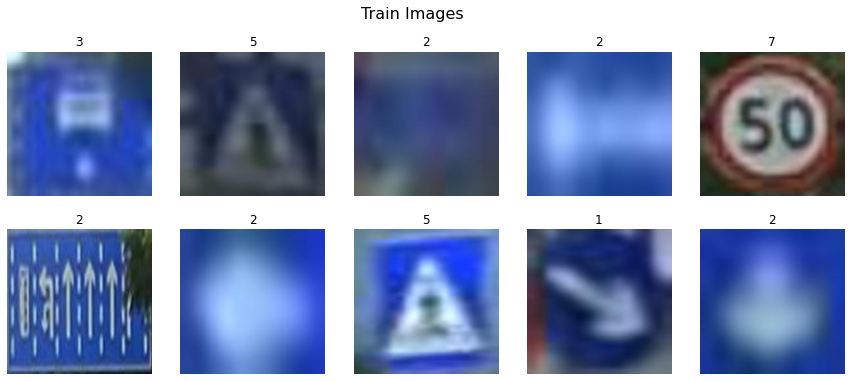

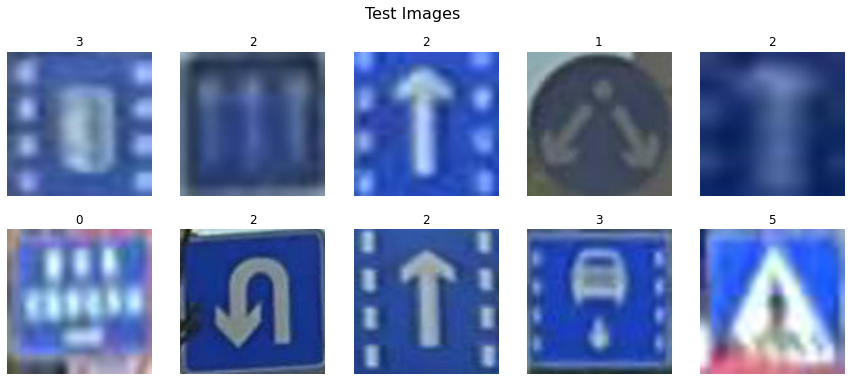

In [41]:
def plot_images(image_paths, labels, title):
    indices = np.random.choice(range(len(image_paths)), 10)
    selected_image_paths = [image_paths[i] for i in indices]
    selected_labels = [labels[i] for i in indices]
    
    images = np.array([img_to_array(load_img(img_path, target_size=(pixel, pixel))) for img_path in selected_image_paths])
    images = images / 255.0
    
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    fig.suptitle(title, fontsize=16)

    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i])
        ax.set_title(selected_labels[i])
        ax.axis('off')

    plt.show()

plot_images(train_image_paths, train_labels, 'Train Images')
plot_images(test_image_paths, test_labels, 'Test Images')

<h1> <strong> 4) Construcción del dataset

In [ ]:
# Define the model
img_height = pixel
img_width = pixel
num_channels = 3

model = Sequential([
    Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same', input_shape=(img_height, img_width, num_channels)),
    MaxPooling2D(pool_size=(5, 5)),
    Flatten(),
    Dense(units=100, activation='relu'),
    Dense(units=num_classes, activation='softmax')
])

# Summary
model.summary()

In [61]:
import tensorflow as tf

model = tf.keras.models.Sequential()

# Añadimos la primera capa
model.add(tf.keras.layers.Conv2D(32,(5,5), strides=(1,1), activation = 'relu', padding='same',input_shape = (224,224,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (5,5)))

# Hacemos un flatten para poder usar una red fully connected con 100 neuronas
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))

# Añadimos una capa softmax para que podamos clasificar las imágenes
model.add(tf.keras.layers.Dense(units= 10, activation='softmax'))

model.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 44, 44, 32)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 61952)             0         
                                                                 
 dense_25 (Dense)            (None, 100)               6195300   
                                                                 
 dense_26 (Dense)            (None, 10)                1010      
                                                                 
Total params: 6,198,742
Trainable params: 6,198,742
Non-trainable params: 0
___________________________________________

In [62]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training parameters
epochs = 20

# Train the model
Entrenamiento1 = model.fit(
    train_datagen_instance,
    epochs=epochs,
    steps_per_epoch=len(train_image_paths) // batch_size
)

Epoch 1/20
25/25 [==============================] - 153s 6s/step - loss: 3.4633 - accuracy: 0.4574
Epoch 2/20
25/25 [==============================] - 164s 7s/step - loss: 1.0496 - accuracy: 0.6602
Epoch 3/20
25/25 [==============================] - 153s 6s/step - loss: 0.6843 - accuracy: 0.7948
Epoch 4/20
25/25 [==============================] - 157s 6s/step - loss: 0.5381 - accuracy: 0.8364
Epoch 5/20
25/25 [==============================] - 154s 6s/step - loss: 0.4655 - accuracy: 0.8635
Epoch 6/20
25/25 [==============================] - 149s 6s/step - loss: 0.4164 - accuracy: 0.8780
Epoch 7/20
25/25 [==============================] - 142s 6s/step - loss: 0.4051 - accuracy: 0.8721
Epoch 8/20
25/25 [==============================] - 141s 6s/step - loss: 0.3626 - accuracy: 0.8938
Epoch 9/20
25/25 [==============================] - 142s 6s/step - loss: 0.3403 - accuracy: 0.9020
Epoch 10/20
25/25 [==============================] - 147s 6s/step - loss: 0.3100 - accuracy: 0.9112
Epoch 11/

In [67]:
model.save("entremaniento1.h5py")

INFO:tensorflow:Assets written to: entremaniento1.h5py\assets


INFO:tensorflow:Assets written to: entremaniento1.h5py\assets


In [65]:
test_loss, test_acc = model.evaluate_generator(test_datagen_instance, steps=test_datagen_instance.n // batch_size)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

C:\Users\a_bah\AppData\Local\Temp/ipykernel_26500/772455497.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_datagen_instance, steps=test_datagen_instance.n // batch_size)


Test loss: 0.2600
Test accuracy: 0.9392


In [80]:
print(Entrenamiento1.history)

{'loss': [3.4633445739746094, 1.049567461013794, 0.684270441532135, 0.538133442401886, 0.4655218720436096, 0.41644951701164246, 0.4051038324832916, 0.36261633038520813, 0.3403139114379883, 0.3099532127380371, 0.31231552362442017, 0.2807358503341675, 0.26486504077911377, 0.2696384787559509, 0.23769749701023102, 0.22920796275138855, 0.20912498235702515, 0.2183171510696411, 0.2139825075864792, 0.21333806216716766], 'accuracy': [0.45735958218574524, 0.6601999998092651, 0.7947929501533508, 0.8364083766937256, 0.8634686470031738, 0.8780238032341003, 0.8720787167549133, 0.8938089609146118, 0.9020090103149414, 0.9112341403961182, 0.9030340313911438, 0.915334165096283, 0.9231242537498474, 0.9177941679954529, 0.9280442595481873, 0.9288643002510071, 0.9387043714523315, 0.9348093271255493, 0.9368593692779541, 0.9368593692779541]}


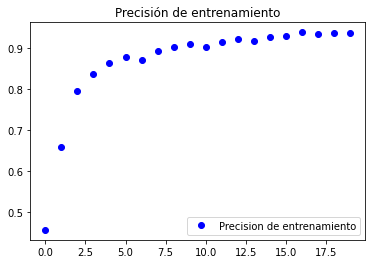

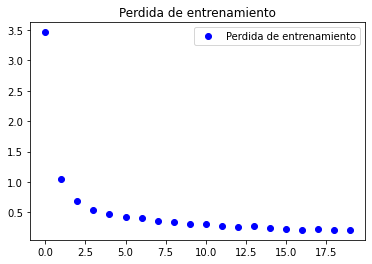

In [86]:
accuracy = Entrenamiento1.history['accuracy']
#val_accuracy = Entrenamiento1.history['val_accuracy']
loss = Entrenamiento1.history['loss']
#val_loss = model.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Precision de entrenamiento')
#plt.plot(epochs, val_accuracy, 'b', label='Exactitud de la validacion')
plt.title('Precisión de entrenamiento')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Perdida de entrenamiento')
#plt.plot(epochs, val_loss, 'b', label='Perdida de validacion')
plt.title('Perdida de entrenamiento')
plt.legend()
plt.show()

<h1> <strong> 6) Elaboración del modelo 2

In [89]:
model = tf.keras.models.Sequential()

# Añadimos la primera capa
model.add(tf.keras.layers.Conv2D(48,(3,3), strides=(1,1), activation = 'relu', padding='same',input_shape = (224,224,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

# Añadimos la segunda capa
model.add(tf.keras.layers.Conv2D(96,(3,3), strides=(1,1), activation = 'relu', padding='same',input_shape = (224,224,3)))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2)))

# Hacemos un flatten para poder usar una red fully connected con 100 neuronas
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))

# Añadimos una capa softmax para que podamos clasificar las imágenes
model.add(tf.keras.layers.Dense(units= 10, activation='softmax'))

model.compile(optimizer="rmsprop",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_19 (Conv2D)          (None, 224, 224, 48)      1344      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 112, 112, 48)     0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 112, 112, 96)      41568     
                                                                 
 max_pooling2d_20 (MaxPoolin  (None, 56, 56, 96)       0         
 g2D)                                                            
                                                                 
 flatten_14 (Flatten)        (None, 301056)            0         
                                                                 
 dense_29 (Dense)            (None, 100)             

<h1> <strong> 7) Entrenamiento 2

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Training parameters
epochs = 20

# Train the model
entrenamiento2 = model.fit(
    train_datagen_instance,
    epochs=epochs,
    steps_per_epoch=len(train_image_paths) // batch_size
)

In [ ]:
model.save("entremaniento2.h5py")

In [ ]:
test_loss, test_acc = model.evaluate_generator(test_datagen_instance, steps=test_datagen_instance.n // batch_size)
print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_acc:.4f}')

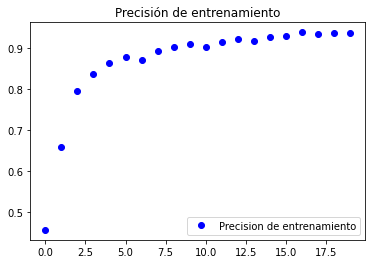

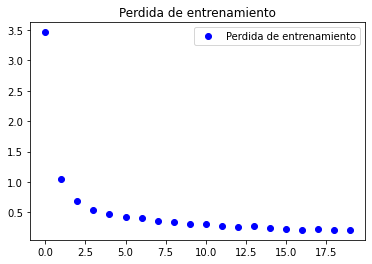

In [88]:
accuracy = Entrenamiento1.history['accuracy']
#val_accuracy = Entrenamiento1.history['val_accuracy']
loss = Entrenamiento1.history['loss']
#val_loss = model.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Precision de entrenamiento')
#plt.plot(epochs, val_accuracy, 'b', label='Exactitud de la validacion')
plt.title('Precisión de entrenamiento')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Perdida de entrenamiento')
#plt.plot(epochs, val_loss, 'b', label='Perdida de validacion')
plt.title('Perdida de entrenamiento')
plt.legend()
plt.show()

<h1> <strong> 8) Ajustes


¿existe alguna diferencia con el entrenamiento anterior?

R/ Si el segundo modelo se sobreentrena 

¿Qué ajustes realizaría al modelo de entrenamiento para lograr obtener un mejor resultado?

R/ 

Explique que otros ajustes puede hacerse al dataset, modelo o técnica para construir un nuevo modelo con el cual posiblemente se pueda mejorar la predicción y modelamiento de los datos.

R/ 

Considere cambios de la función de activación, aumento o disminución de neuronas y/o capas, funcion de aprendizaje

Tratamiento adicional de los datos

Rendimiento, ¿es necesario agregar o eliminar neuronas o capas?, métodos de entrenamiento (secuencial, batch)

En que medida influencia agregar una capa de Dropout, y que nivel El